In [7]:
!nvidia-smi

Thu Nov 14 13:04:37 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:

# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [10]:

from ultralytics import YOLO

from IPython.display import display, Image

# Training

In [14]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("dpl302m-lwlob").project("waste-classification-i0drg")
dataset = project.version(1).download("yolov8")

/content/datasets
You are already logged into Roboflow. To make a different login,run roboflow.login(force=True).
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to waste-classification-1 in yolov8:: 100%|██████████| 9708/9708 [00:04<00:00, 1977.26it/s]


In [15]:

%cd {HOME}

!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 83.7M/83.7M [00:00<00:00, 127MB/s]
New https://pypi.org/project/ultralytics/8.3.31 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/waste-classification-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

/content


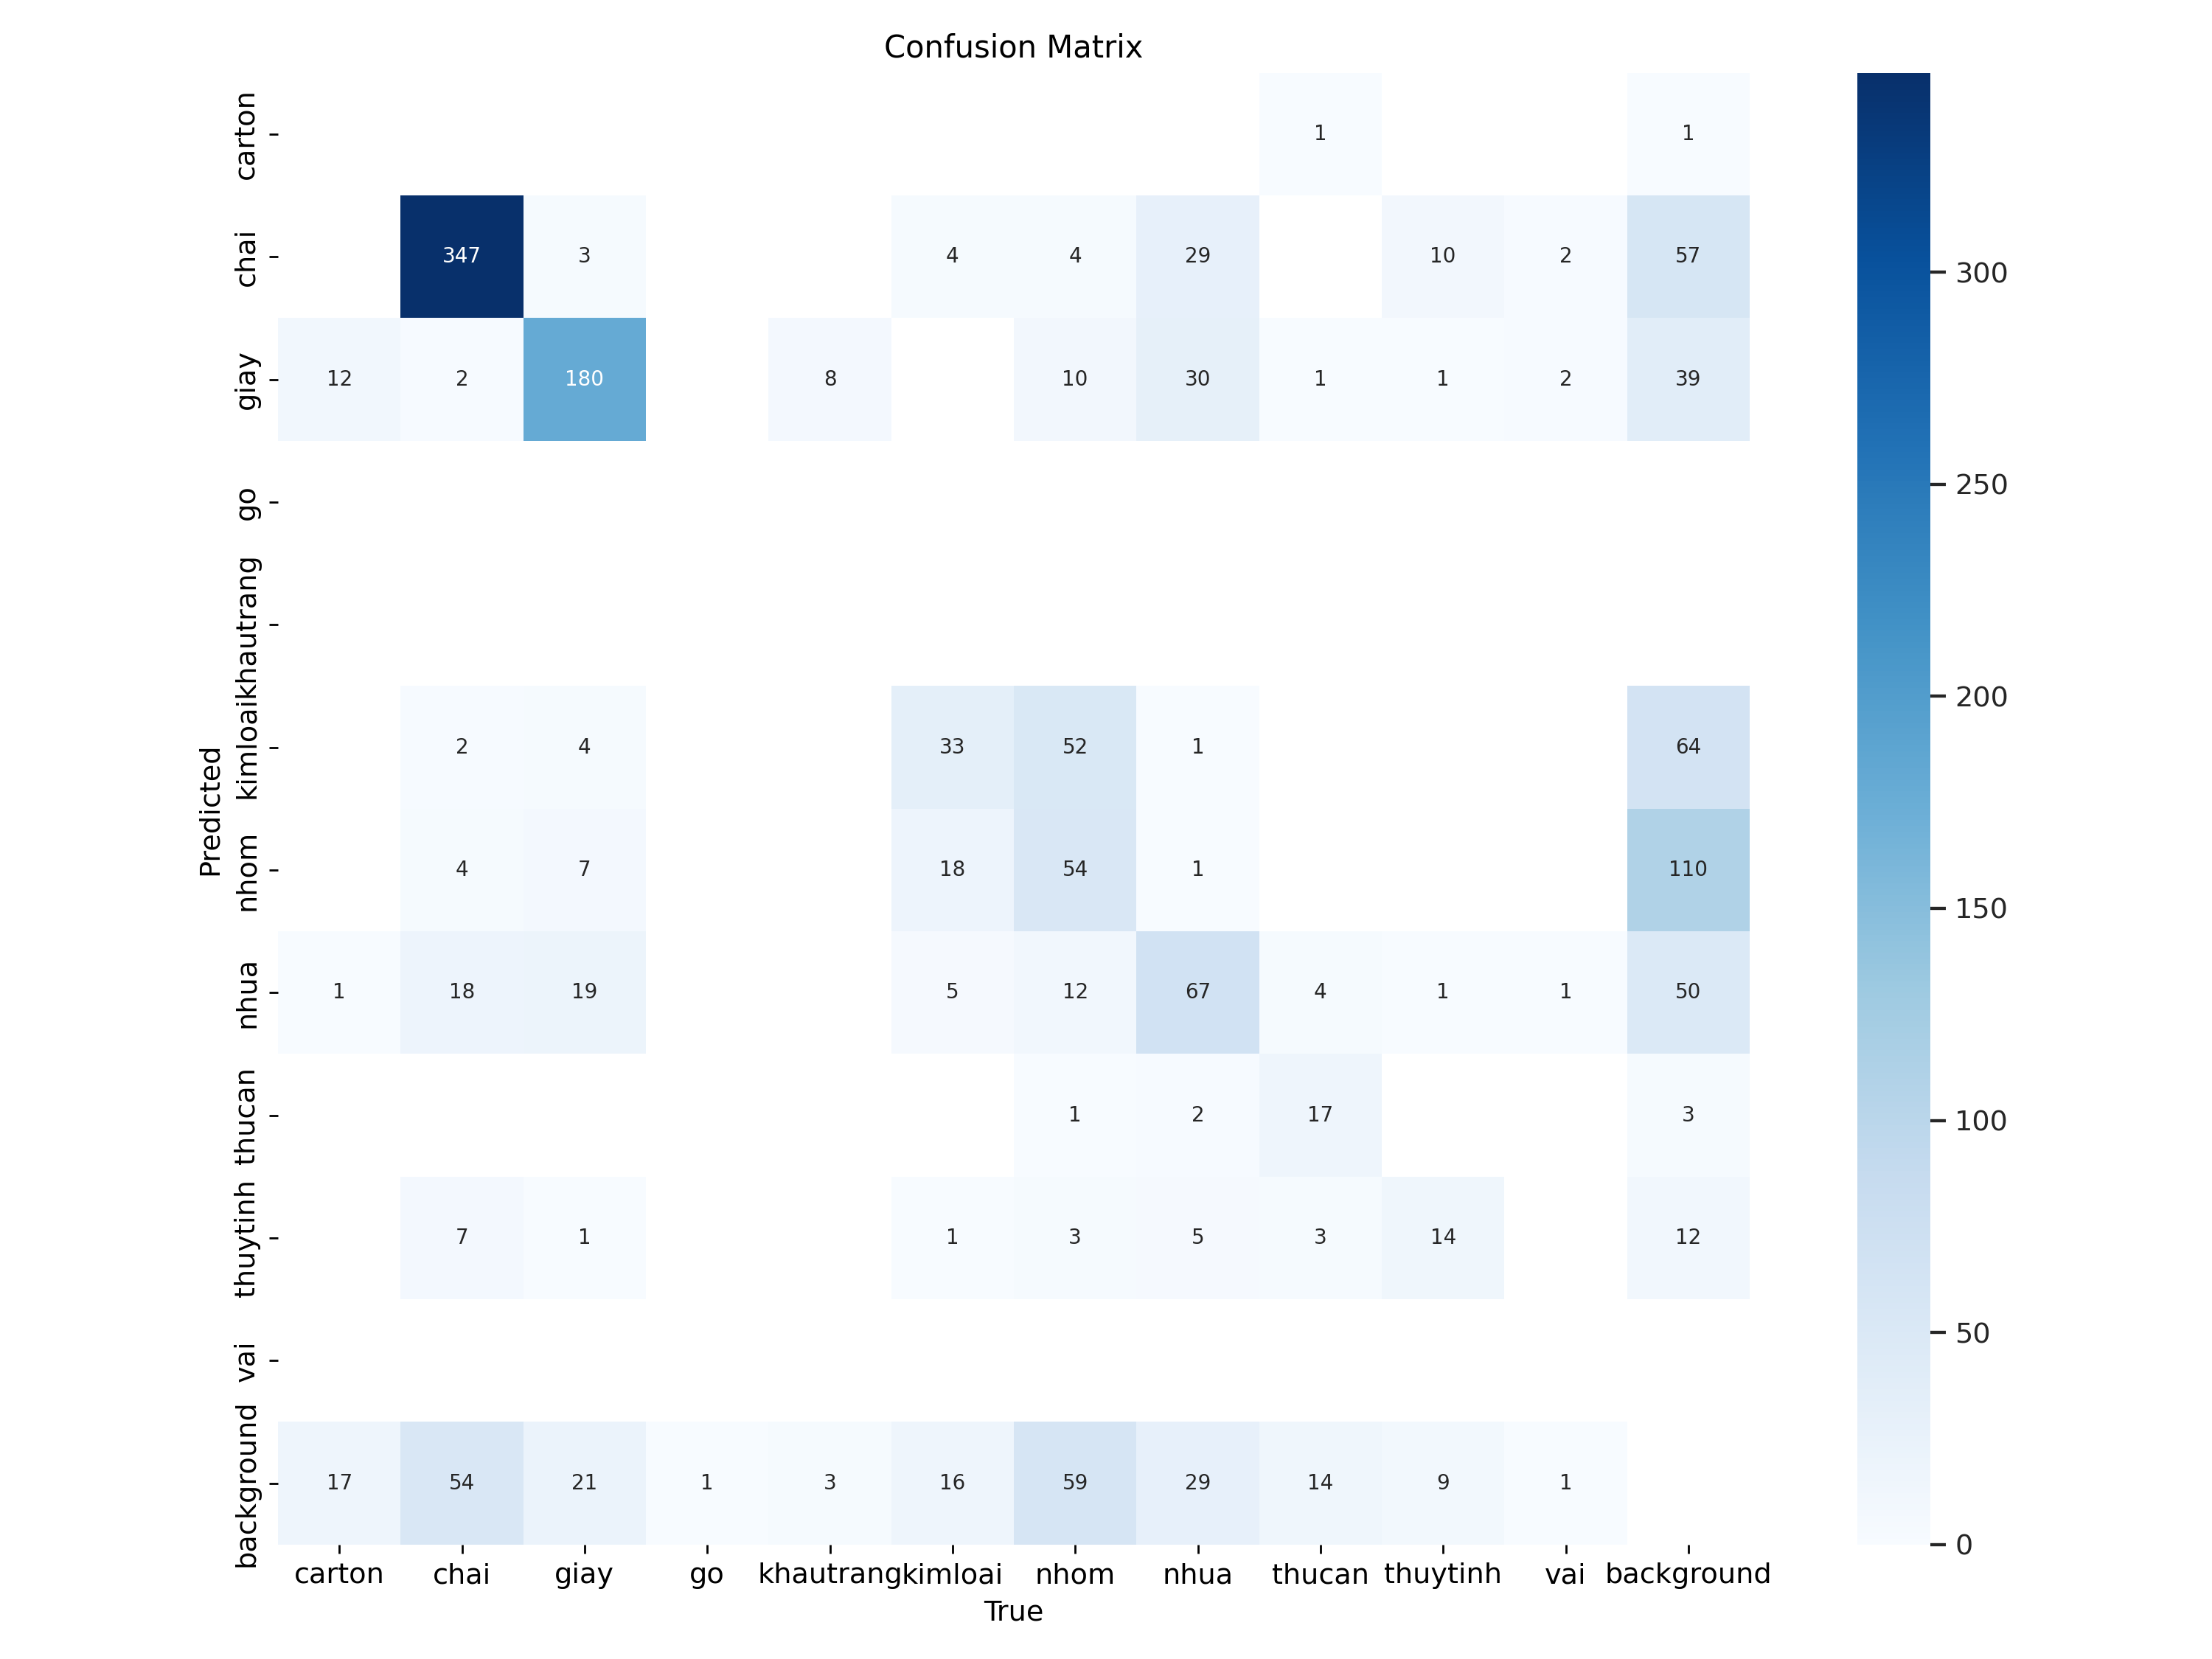

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


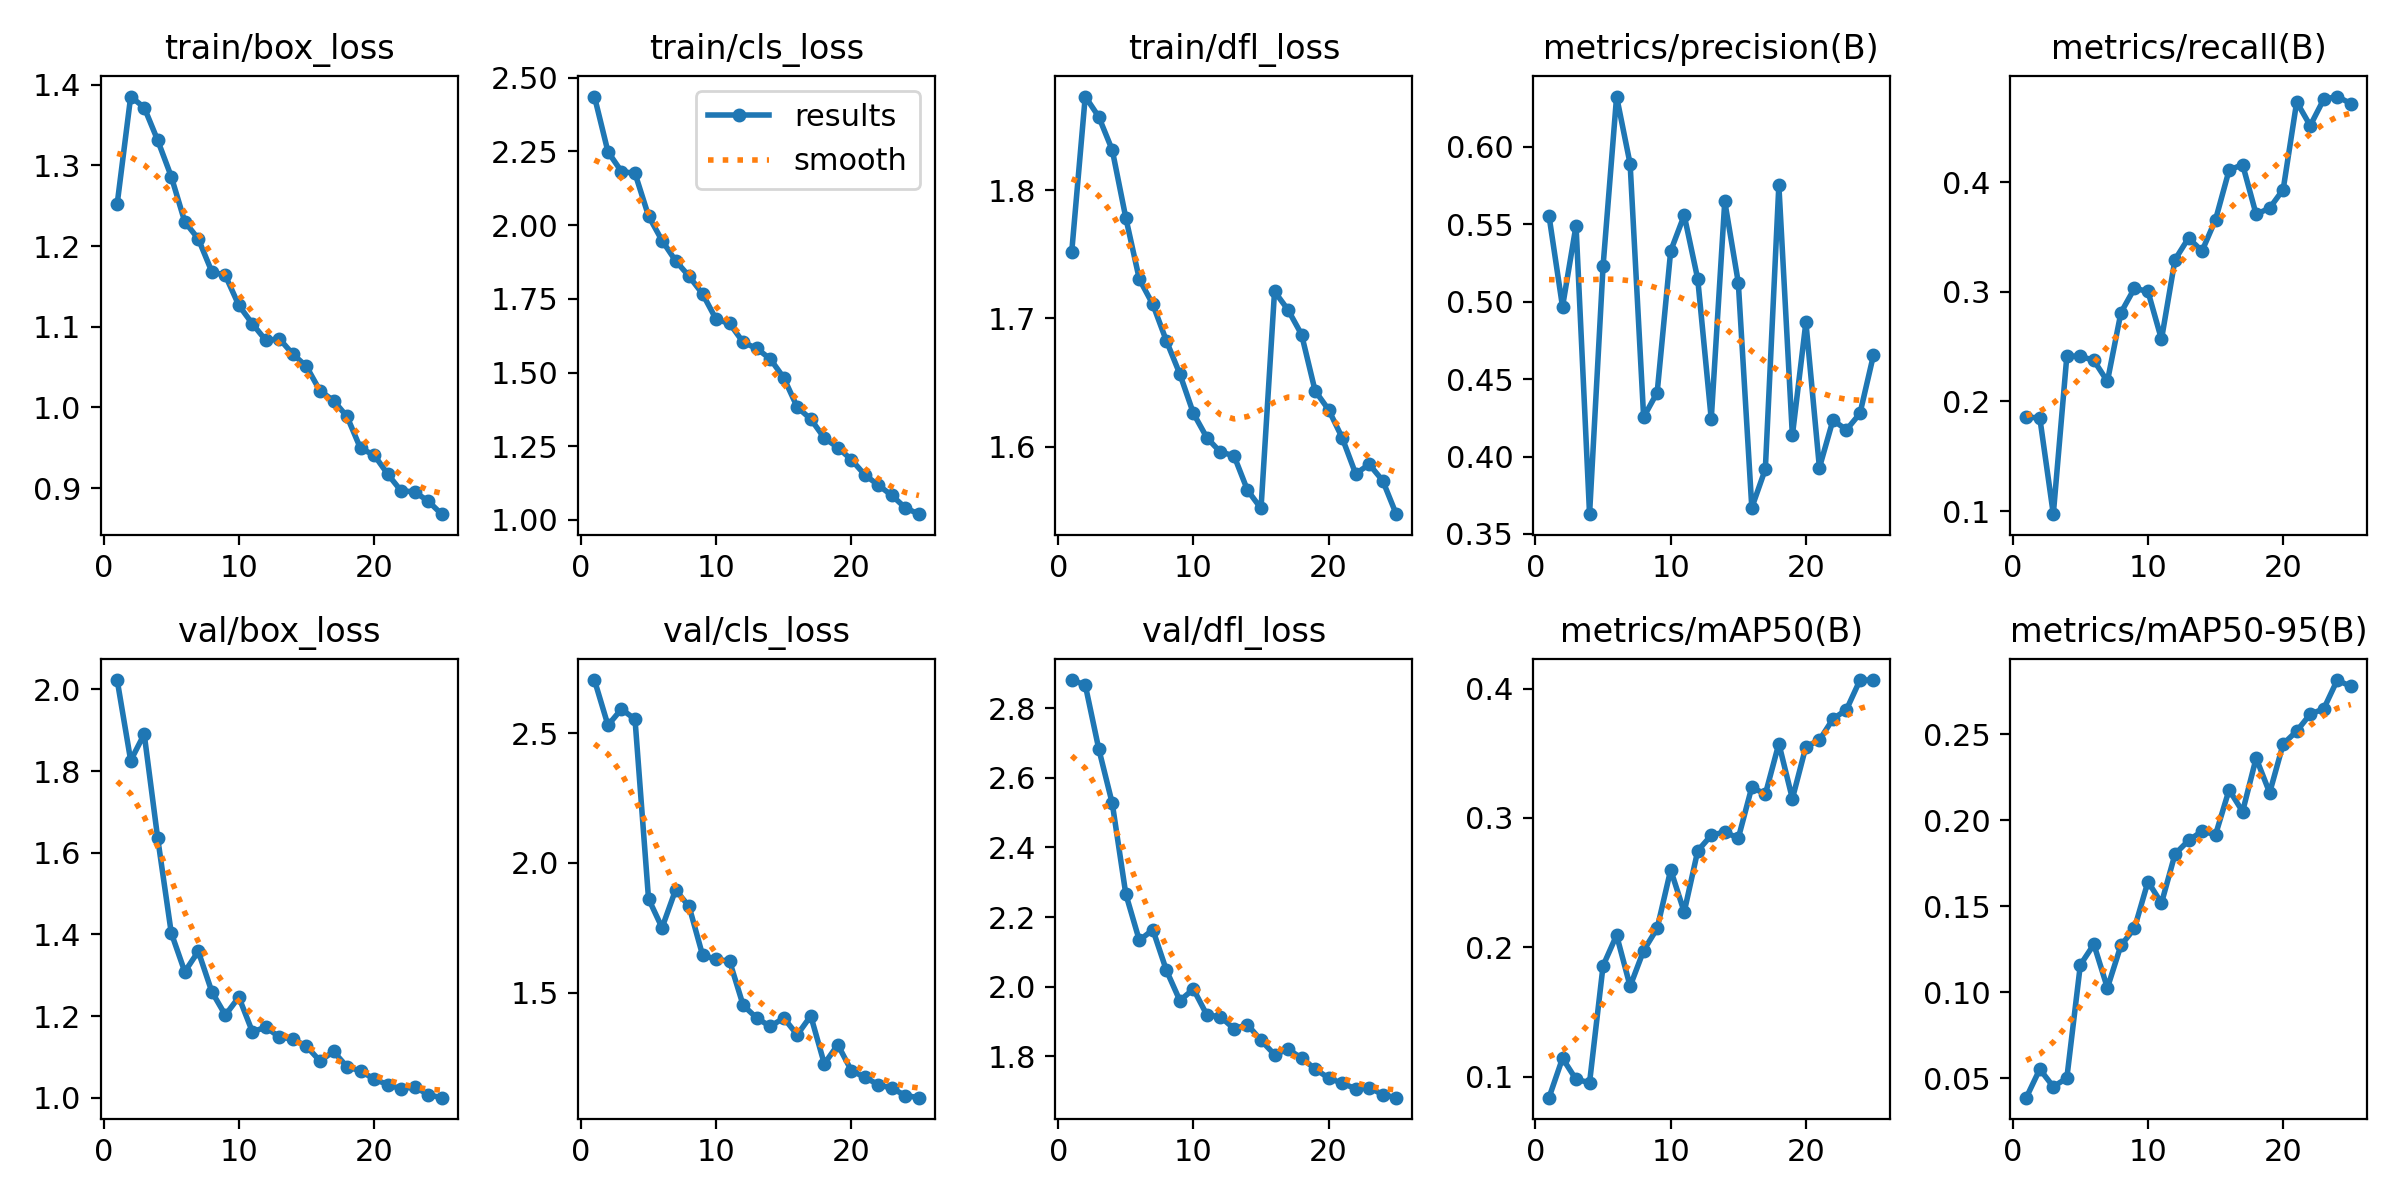

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


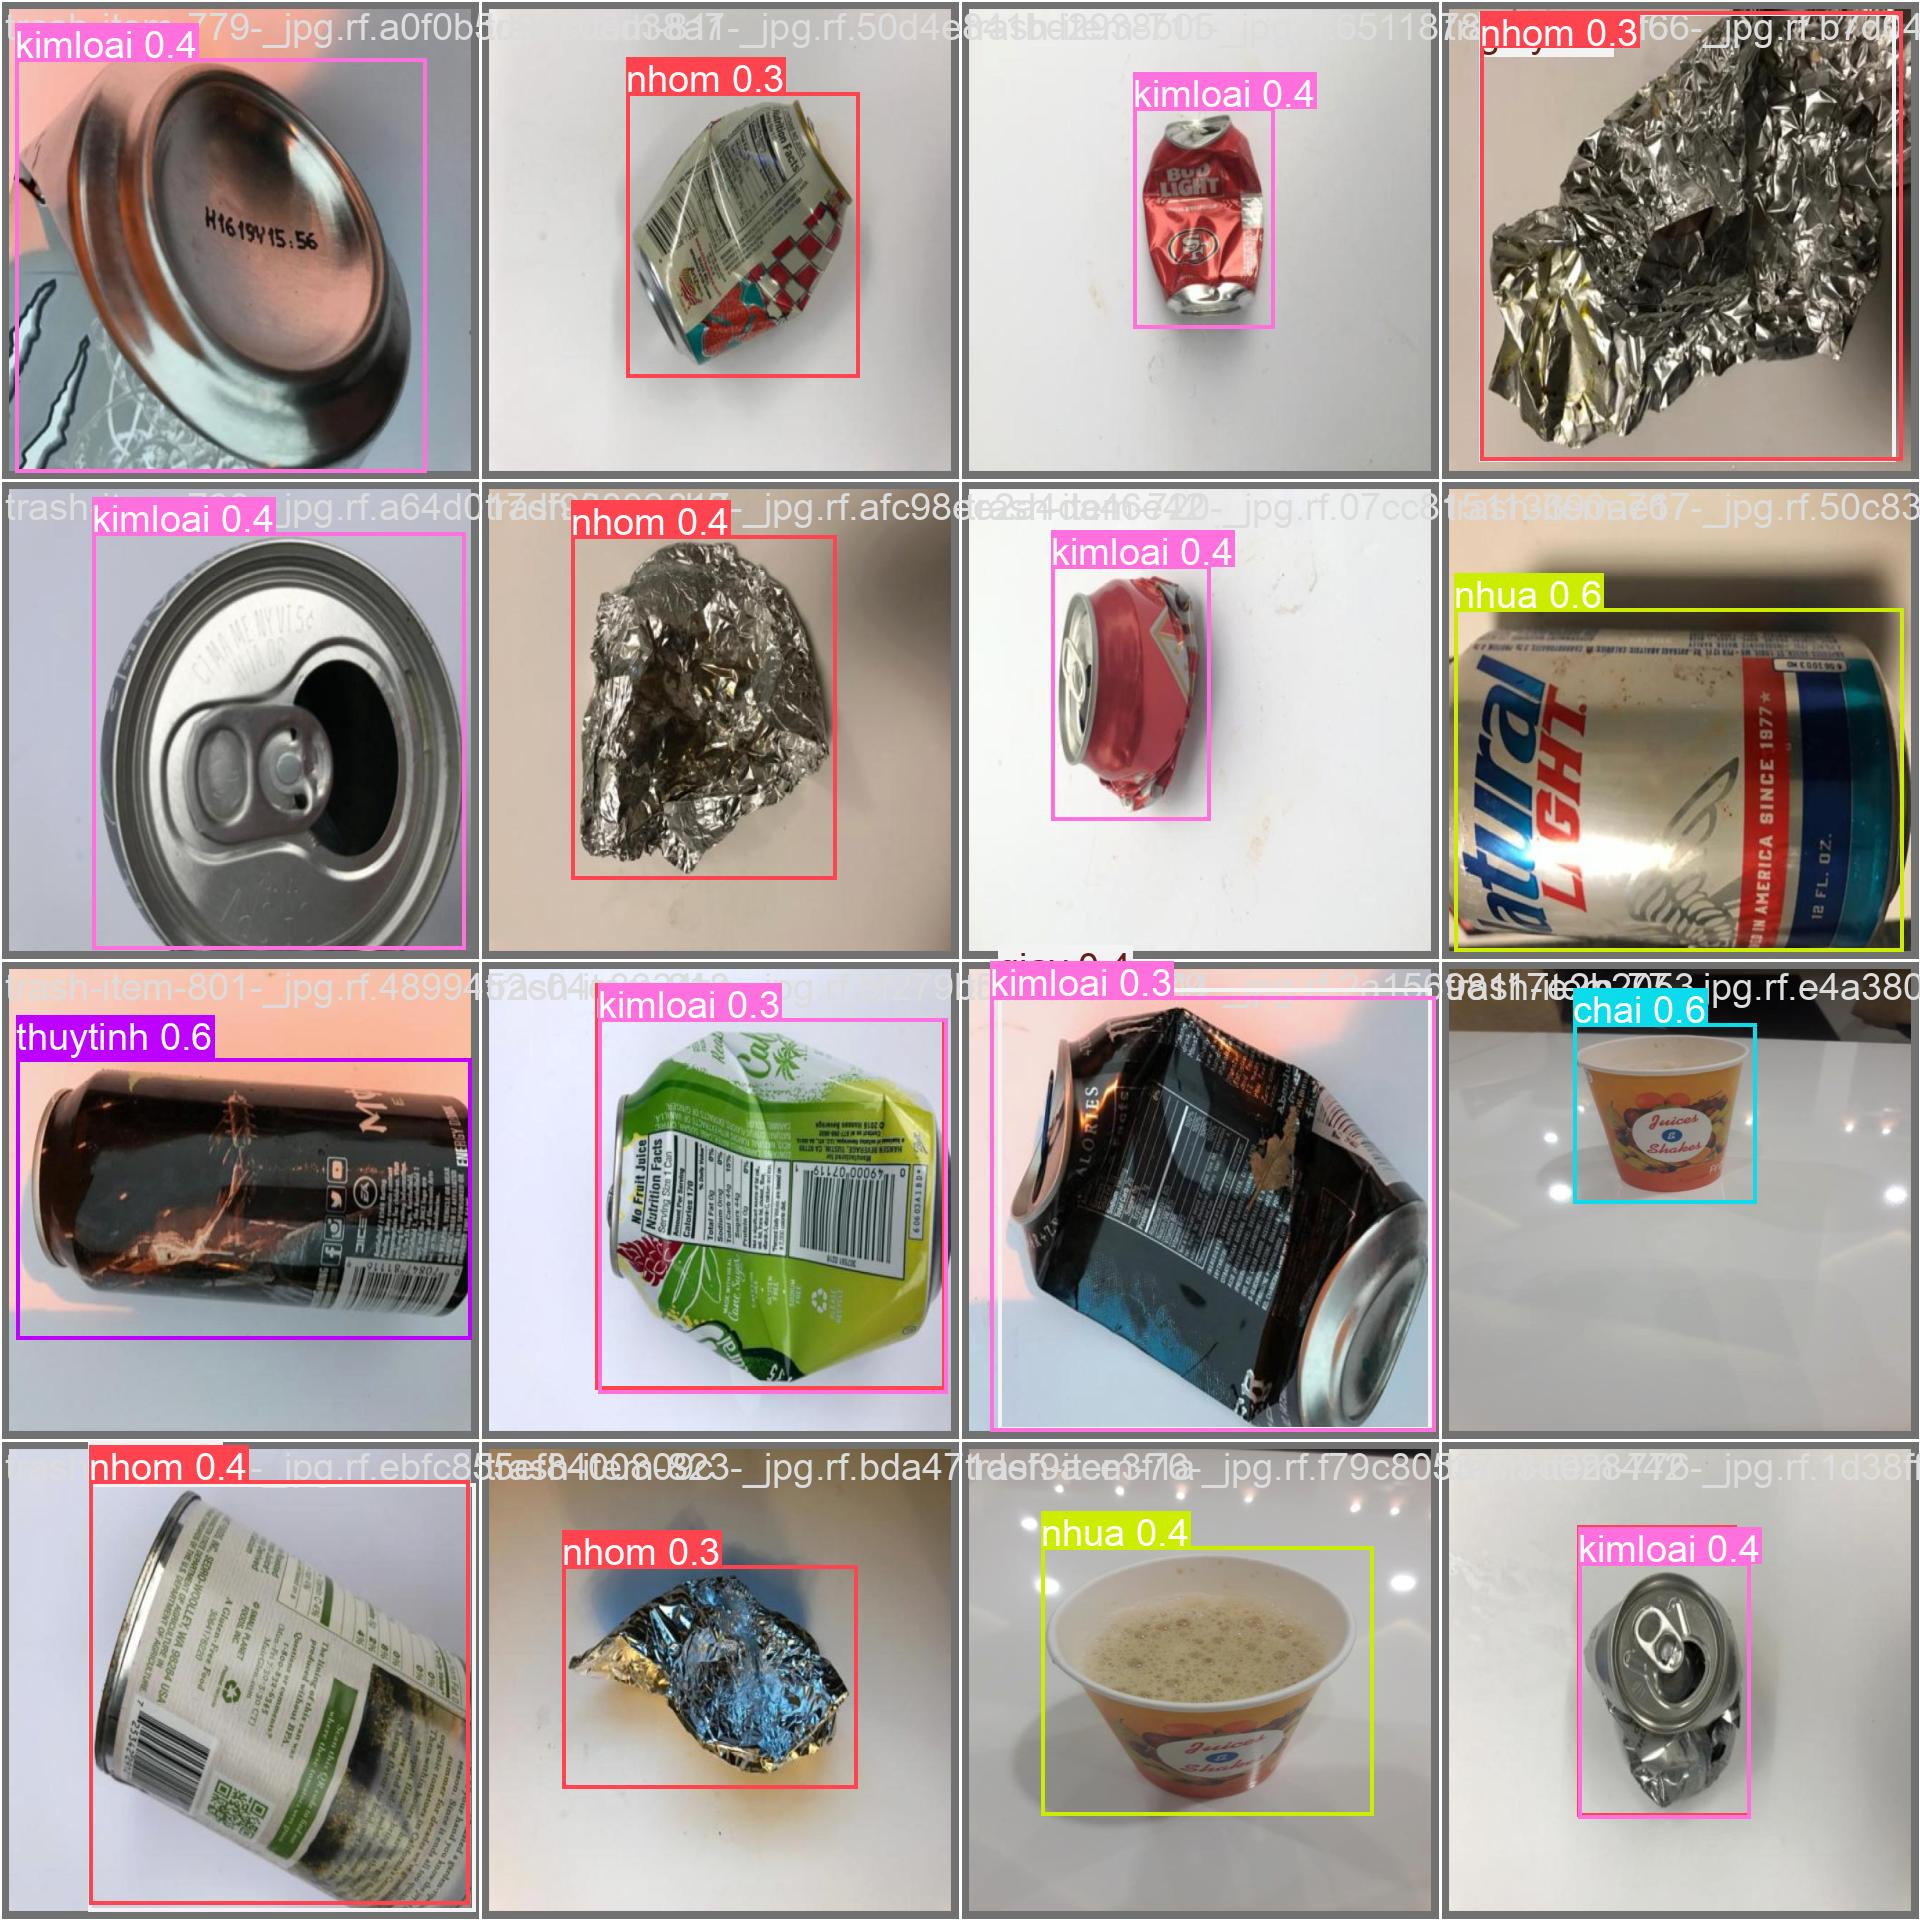

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

# Validate Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,615,089 parameters, 0 gradients, 164.9 GFLOPs
val: Scanning /content/datasets/waste-classification-1/valid/labels.cache... 949 images, 0 backgrounds, 0 corrupt: 100% 949/949 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 124, len(boxes) = 1228. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 60/60 [00:58<00:00,  1.02it/s]
                   all        949       1228      0.429      0.477      0.406      0.281
                carton         23         30      0.439        0.2      0.236      0.135
                  chai        320        434      0.689      0.862      0.848      0.584
        

# Inference with Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43,615,089 parameters, 0 gradients, 164.9 GFLOPs

image 1/478 /content/datasets/waste-classification-1/test/images/-10_jpg.rf.db47cab059ad0f9f6aec1e15d6a343d1.jpg: 800x800 1 chai, 90.7ms
image 2/478 /content/datasets/waste-classification-1/test/images/-78_jpg.rf.ce105580385da759b380e747dec02332.jpg: 800x800 4 chais, 58.4ms
image 3/478 /content/datasets/waste-classification-1/test/images/0002_jpg.rf.cd5b27c36579bf3e7ee6ad749b1240d8.jpg: 800x800 1 giay, 59.4ms
image 4/478 /content/datasets/waste-classification-1/test/images/0004_jpg.rf.2f27c127b1f76c239827bb3298715307.jpg: 800x800 1 giay, 62.1ms
image 5/478 /content/datasets/waste-classification-1/test/images/0010_jpg.rf.49af551dff0a8f00f07db8e93315e7f9.jpg: 800x800 1 chai, 61.0ms
image 6/478 /content/datasets/waste-classification-1/test/images/0019_jpg.rf.0da7d6122b5b8806f06de25bd43b13cf.jpg: 800x800 1 giay

# A few result


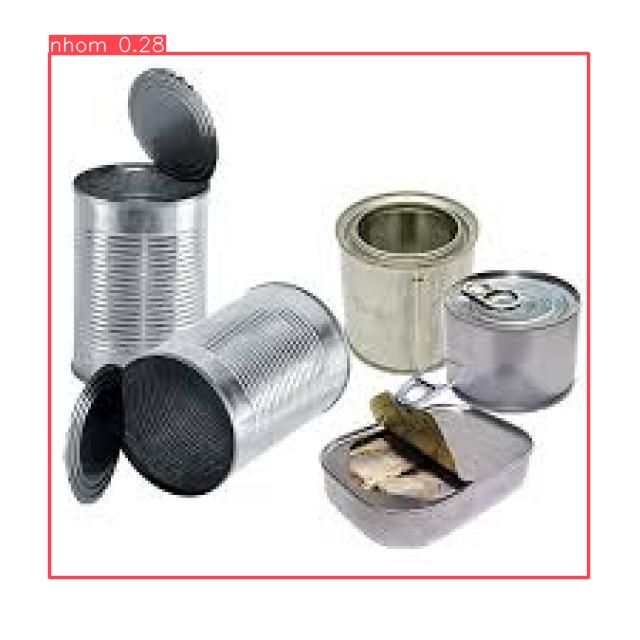

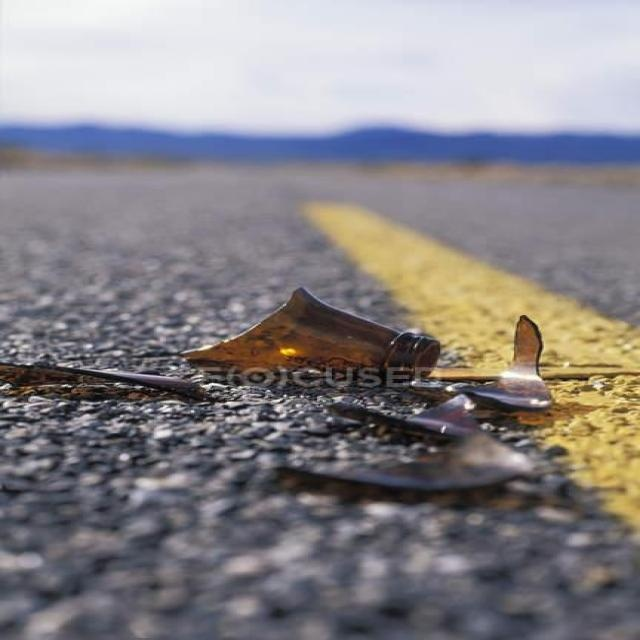

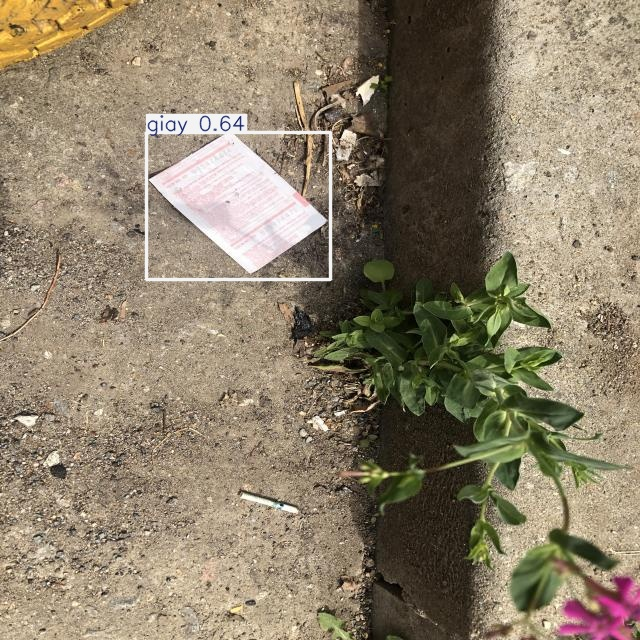

In [21]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")